In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

c:\workspace\DL-Exercise\notebooks\DL3_20241006\ch05
c:\workspace\DL-Exercise\notebooks\DL3_20241006


==========iteration:0==========
std=0.01:2.302488479473465
Xavier:2.3047758838259127
He:2.3766357247080805
==========iteration:100==========
std=0.01:2.3032719563510202
Xavier:2.2281915844208964
He:1.5705711870402923
==========iteration:200==========
std=0.01:2.3013229568840683
Xavier:2.0631163016427045
He:0.9124174989578344
==========iteration:300==========
std=0.01:2.3019922768303673
Xavier:1.6118690479598408
He:0.5548411346420837
==========iteration:400==========
std=0.01:2.303576501627403
Xavier:1.0946976647800506
He:0.4044586460147417
==========iteration:500==========
std=0.01:2.3040826517741104
Xavier:0.8269018879315123
He:0.42031166579072554
==========iteration:600==========
std=0.01:2.299641140417113
Xavier:0.795654799137096
He:0.5215942030309283
==========iteration:700==========
std=0.01:2.300431925885368
Xavier:0.5008457587851668
He:0.26056903144731114
==========iteration:800==========
std=0.01:2.3077530123803527
Xavier:0.47716250156801343
He:0.33417419150066563
==========ite

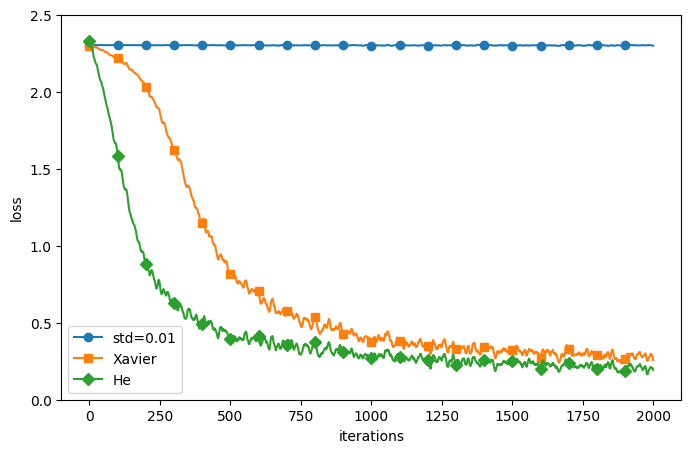

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {'std=0.01' : 0.01, 'Xavier' : 'sigmoid', 'He' : 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}

# 설정
for key, weight_type in weight_init_types.items() :
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 학습
for i in range(max_iterations) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys() :
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0 :
        print('==========' + 'iteration:' + str(i) + '==========')
        for key in weight_init_types.keys() :
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {'std=0.01' : 'o', 'Xavier' : 's', 'He' : 'D'}
x = np.arange(max_iterations)

plt.figure(figsize=(8, 5))

for key in weight_init_types.keys() :
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, 2.5)
plt.legend()
plt.show()

/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL
===========iteration:0===========
std=0.01:2.3025415863273846
Xavier:2.3012619398682843
He:2.3337968991110105
===========iteration:100===========
std=0.01:2.302431295831779
Xavier:2.233198230993929
He:1.6446902146040312
===========iteration:200===========
std=0.01:2.3021553196881084
Xavier:2.1225379406569163
He:0.8587309178496132
===========iteration:300===========
std=0.01:2.3018940148212717
Xavier:1.8676419460833982
He:0.5370774859943153
===========iteration:400===========
std=0.01:2.305601746142913
Xavier:1.4009682378150918
He:0.4845451487447724
===========iteration:500===========
std=0.01:2.3007374900314623
Xavier:0.8524874968231818
He:0.33272599780217293
===========iteration:600===========
std=0.01:2.3017957539561533
Xavier:0.6648282002835912
He:0.3616385856568929
===========iteration:700===========
std=0.01:2.29894945373452
Xavier:

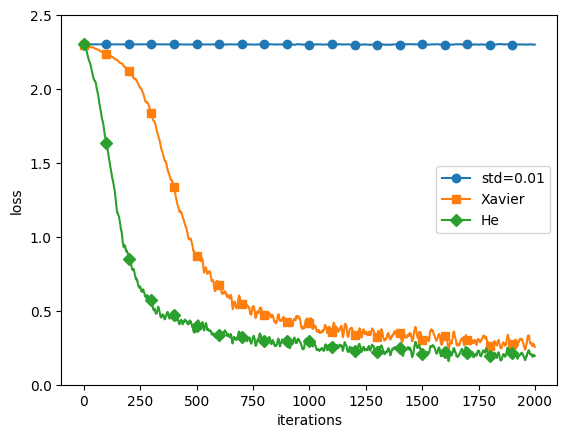

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)
